In [1]:
# -- (4) Building Regularized Regression Models -- #
# The first several videos in this module are background/information w/o demos - see terms.md

In [2]:
# -- Defining Helper Functions to Build and Train Models and Compare Results -- #
"""
Models:
- Lasso
- Ridge
- Elastic Net
"""

'\nModels:\n- Lasso\n- Ridge\n- Elastic Net\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Linear regression estimator objects
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [4]:
automobile_df = pd.read_csv('datasets/auto-mpg/processed.csv')

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,31.0,4,71.0,65,1773,19.0,52
1,26.0,4,156.0,92,2585,14.5,41
2,39.0,4,86.0,64,1875,16.4,42
3,13.0,8,350.0,145,4055,12.0,47
4,36.0,4,79.0,58,1825,18.6,46


In [5]:
result_dict = {}

In [16]:
# Helper function that abtracts away some of the boiler plate when building a model
def build_model(
    regression_fn, 
    name_of_y_col, 
    names_of_x_cols, 
    dataset, 
    test_frac=0.2, 
    preprocess_fn=None, 
    show_plot_Y=False, 
    show_plot_scatter=False
):
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]
    
    if preprocess_fn is not None:
        X = preprocess_fn(X)
        
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training score: ", model.score(x_train, y_train))
    print("Test score: ", r2_score(y_test, y_pred))
    
    if show_plot_Y == True:
        fix, ax = plt.subplots(figsize=(12,8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label="Actual")
        
        plt.ylabel(name_of_y_col)
        
        plt.legend()
        plt.show()
        
    if show_plot_scatter == True:
        # This will only work when just a single training feature was used
        fix, ax = plt.subplots(figsize=(12,8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
                
        plt.legend(['Predicted line', 'Observed data'])
        plt.show()
        
    return {
        'training_score': model.score(x_train, y_train),
        'test_score': r2_score(y_test, y_pred)
    }

In [7]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score: ', result_dict[key]['training_score'])
        print('Test score: ', result_dict[key]['test_score'])
        print()

In [8]:
# -- Single Feature, Kitchen Sink, and Parsimonious Regression -- #

In [11]:
def linear_reg(x_train, y_train):
    # Does not take normalize=True as it does in video
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    return model

Training score:  0.6881406594698429
Test score:  0.7103575270683329


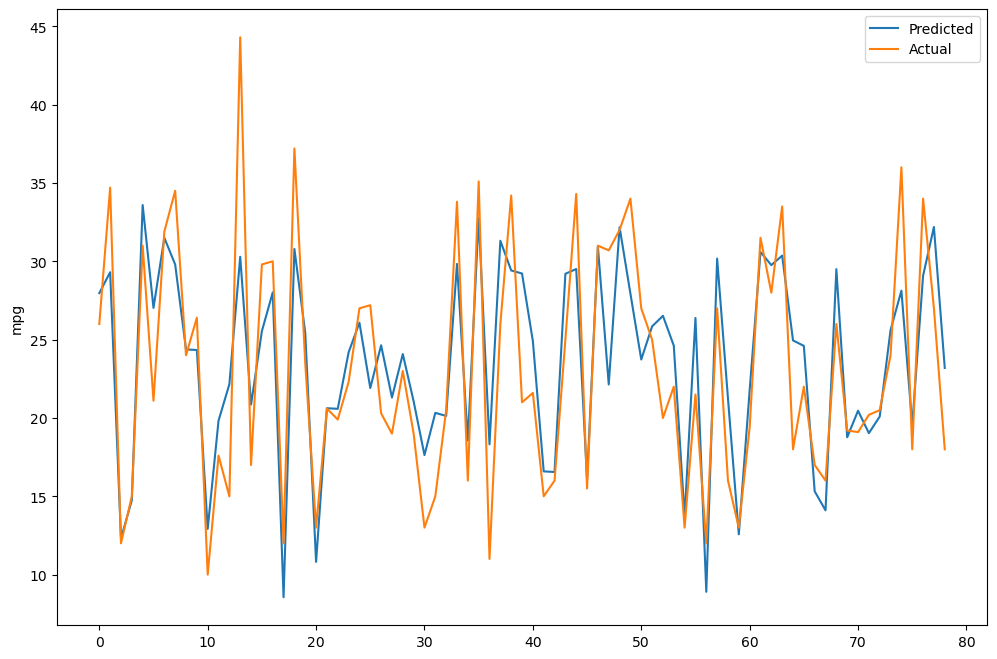

In [17]:
# Single linear (one feature - weight)
result_dict['mpg - single_linear'] = build_model(linear_reg, 'mpg', ['weight'], automobile_df, show_plot_Y=True)

Training score:  0.6905566852404332
Test score:  0.7376605421872513


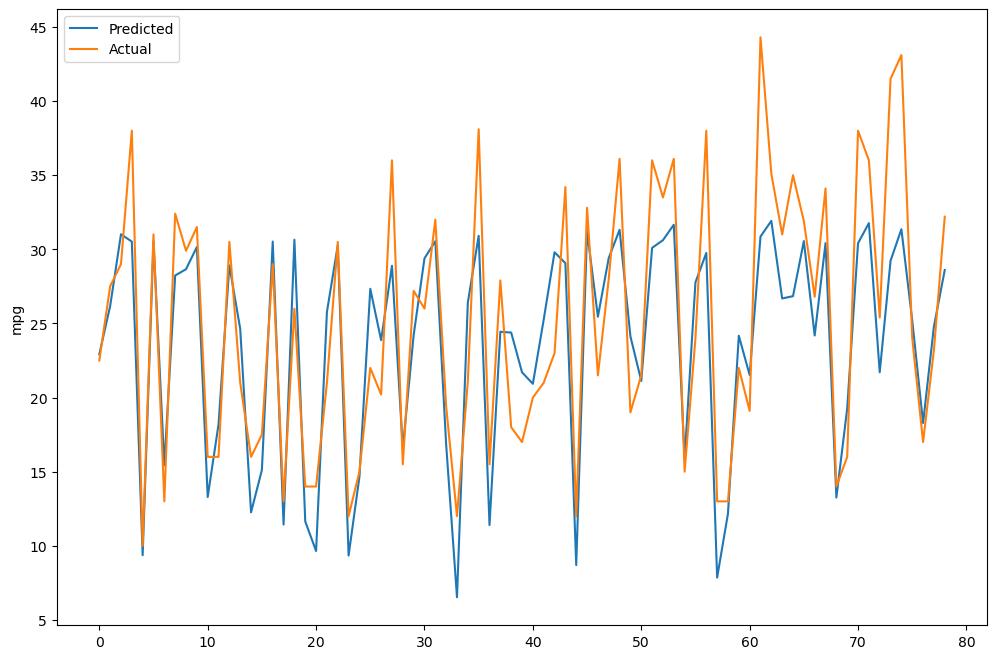

In [19]:
# Kitchen sink (every feature)
features = ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']
result_dict['mpg - kitchen_sink_linear'] = build_model(linear_reg, 'mpg', features, automobile_df, show_plot_Y=True)

Training score:  0.7069855985365153
Test score:  0.6971042879601848


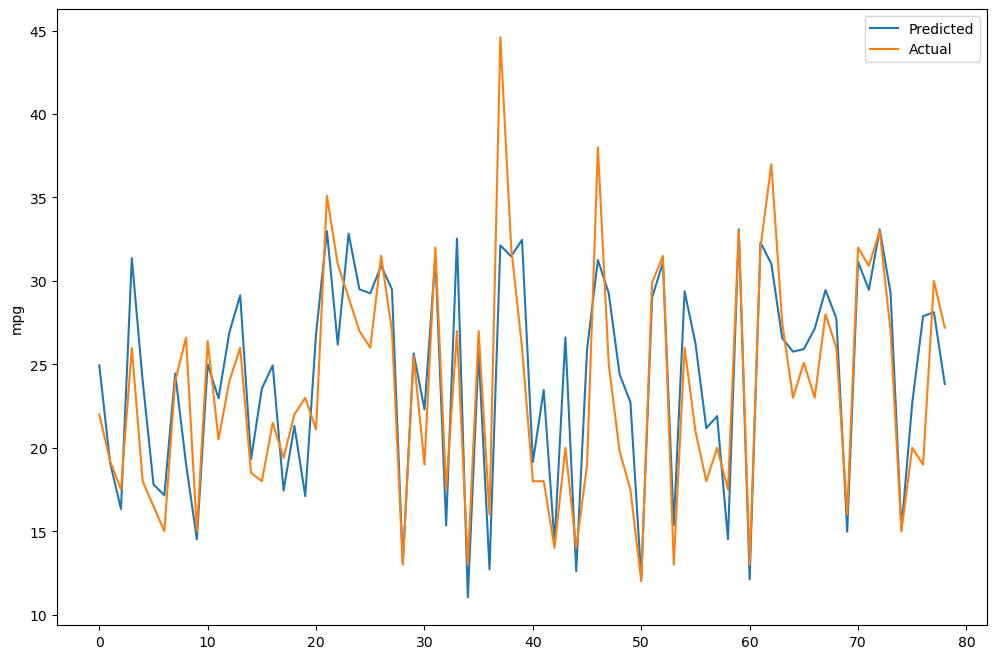

In [20]:
# Parsimonious linear (select features)
# Using a smaller number of features can drastically improve performance when there are millions of training records
features = ['weight', 'horsepower']
result_dict['mpg - parsimonious_linear'] = build_model(linear_reg, 'mpg', features, automobile_df, show_plot_Y=True)

In [21]:
compare_results()

Regression:  mpg - single_linear
Training score:  0.6881406594698429
Test score:  0.7103575270683329

Regression:  mpg - kitchen_sink_linear
Training score:  0.6905566852404332
Test score:  0.7376605421872513

Regression:  mpg - parsimonious_linear
Training score:  0.7069855985365153
Test score:  0.6971042879601848



In [22]:
# -- Lasso Regression --#
"""
Lasso Regression uses L1 regularization to add a penalty to our loss function

The objective of this penalty function is to reduce the magnitude of regression coefficients so that we don't end up
    with an overly complex/overfitted model
    
When using kitchen sink regression because you don't know which features are significant
    it's best to use a regularized model
"""

"\nLasso Regression uses L1 regularization to add a penalty to our loss function\nThe objective of this penalty function is to reduce the magnitude of regression coefficients so that we don't end up\n    with and overly complex/overfitted model\n"

In [32]:
def lasso_reg(x_train, y_train, alpha=0.5):
    # Alpha is a hyperparameter constant used to multiply the L1 regularization term (defaults to 1)
        # Alpha 0 would eliminate the L1 penalty term, making it an ordinary linear (least squared) regeression model
        # This should not be done, for "numerical reasons" (?), and LinearRegression should be used for that case
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.7002031029771738
Test score:  0.7327844464505631


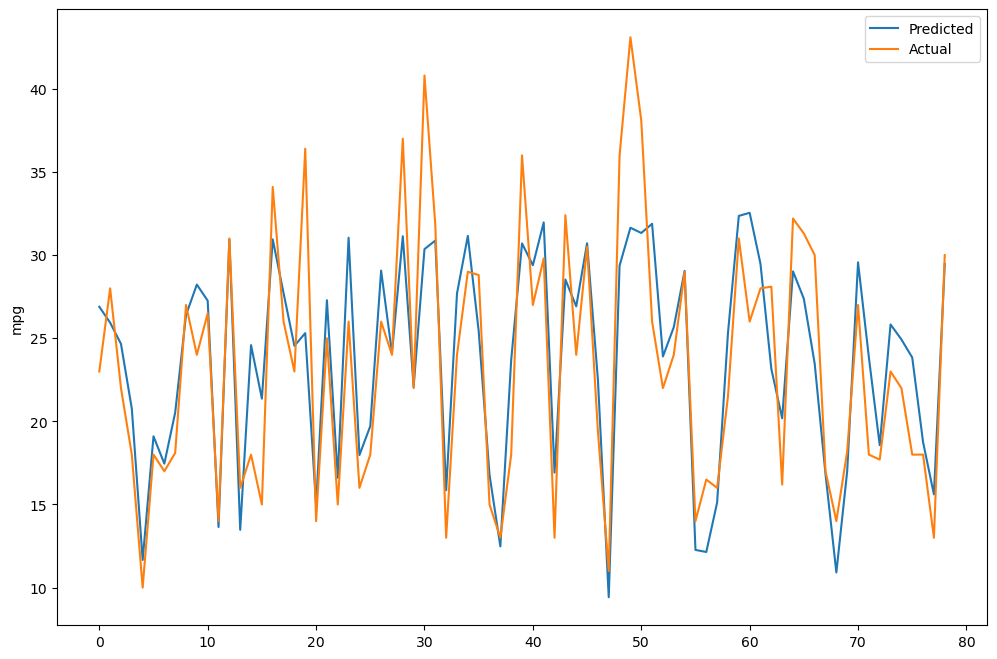

In [33]:
features = ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']
result_dict['mpg - kitchen_sink_lasso'] = build_model(lasso_reg, 'mpg', features, automobile_df, show_plot_Y=True)

In [34]:
compare_results()

Regression:  mpg - single_linear
Training score:  0.6881406594698429
Test score:  0.7103575270683329

Regression:  mpg - kitchen_sink_linear
Training score:  0.6905566852404332
Test score:  0.7376605421872513

Regression:  mpg - parsimonious_linear
Training score:  0.7069855985365153
Test score:  0.6971042879601848

Regression:  mpg - kitchen_sink_lasso
Training score:  0.7002031029771738
Test score:  0.7327844464505631



In [35]:
## -- Ridge Regression --#
"""
Also imposes a penalty on an overly complex model by using regularization
Uses L2 rather than L1 regularization in the loss function to reduce the magnitude of the coefficients
The L2 regularization term is the L2 norm of the coefficients which is the sum of the square of the coefficients
"""

'\nAlso imposes a penalty on an overly complex model by using regularization\nUses L2 rather than L1 regularization in the loss function to reduce the magnitude of the coefficients\nThe L2 regularization term is the L2 norm of the coefficients which is the sum of the square of the coefficients\n'

In [53]:
def ridge_reg(x_train, y_train, alpha=0.5):
    # Alpha is the regularization strength, positive floating point value, larger the value strong the regularization
    # Does not take normalize=True as it does in the video
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.6912231871580621
Test score:  0.7551857329851074


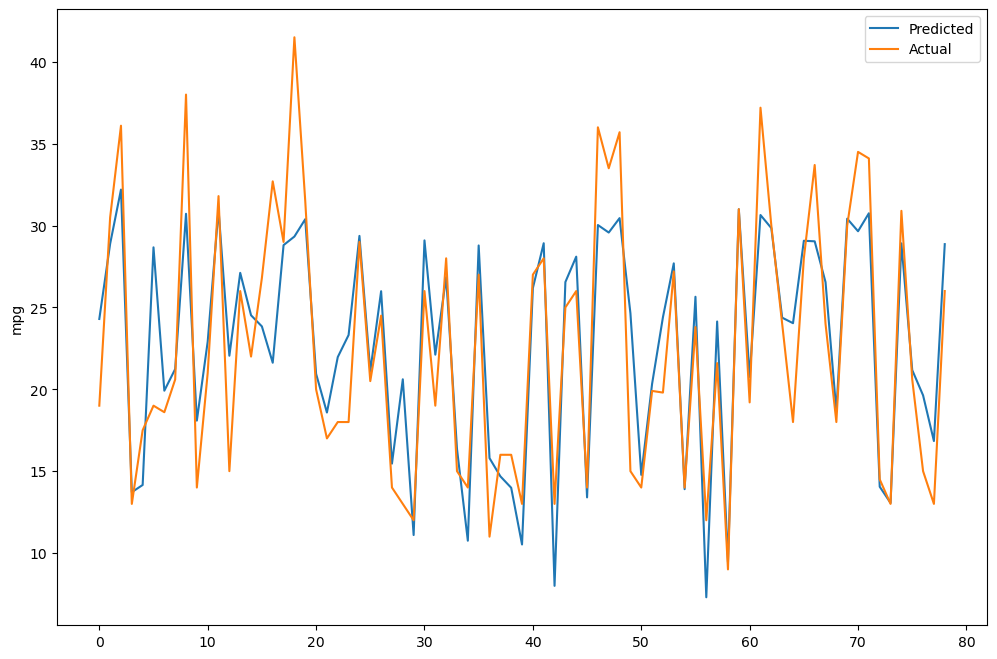

In [54]:
# Again because it's regularized we will perform kitchen sink regression
features = ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']
result_dict['mpg - kitchen_sink_ridge'] = build_model(ridge_reg, 'mpg', features, automobile_df, show_plot_Y=True)

In [50]:
compare_results()

# Note: Seems concerning that if I rerun a given model (Ridge), my results can range by over 10%...

Regression:  mpg - single_linear
Training score:  0.6881406594698429
Test score:  0.7103575270683329

Regression:  mpg - kitchen_sink_linear
Training score:  0.6905566852404332
Test score:  0.7376605421872513

Regression:  mpg - parsimonious_linear
Training score:  0.7069855985365153
Test score:  0.6971042879601848

Regression:  mpg - kitchen_sink_lasso
Training score:  0.7002031029771738
Test score:  0.7327844464505631

Regression:  mpg - kitchen_sink_ridge
Training score:  0.6955282810616856
Test score:  0.7548707712158919



In [55]:
# ---------------------------- #
# -- Elastic Net Regression -- #
"""
Combines both Lasso and Ridge regression
Reduces the magnitude of regression coefficients by applying both L1 and L2 regularization
The combination is a parameter than can be tweaked
"""

'\nCombines both Lasso and Ridge regression\nReduces the magnitude of regression coefficients by applying both L1 and L2 regularization\nThe combination is a parameter than can be tweaked\n'

In [56]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, max_iter=100000, warm_start=True, equivalent_to='Elastic Net'):
    print("Equivalent to: ", equivalent_to)
    
    # Alpha determines regularization strength (as above)
    # l1_ratio is the "ElasticNet" mixing parameter
        # This is the ratio that can be tweaked to determine in which combination L1 and L2 regularization are applied
        # 0 = L2 penalty (Ridge)
        # 1 = L1 penalty (Lasso)
        # We are using 0.5
    # Instructor evaluated max_iter and found 100,000 produced good results
    # warm_start=True will reuse the solution of the previous call to fit as a initialization (caching?)
        # Otherwise warm_start=False will erase the previous solution and start fresh
    # equivalent_to is something I assume we're passing in just to help understand different values of l1_ratio
    # Does not take normalize=False as it does in the video
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=max_iter, warm_start=warm_start)
    
    model.fit(x_train, y_train)
    
    return model

Equivalent to:  OLS
Training score:  0.7091031973214064
Test score:  0.6934488992763654


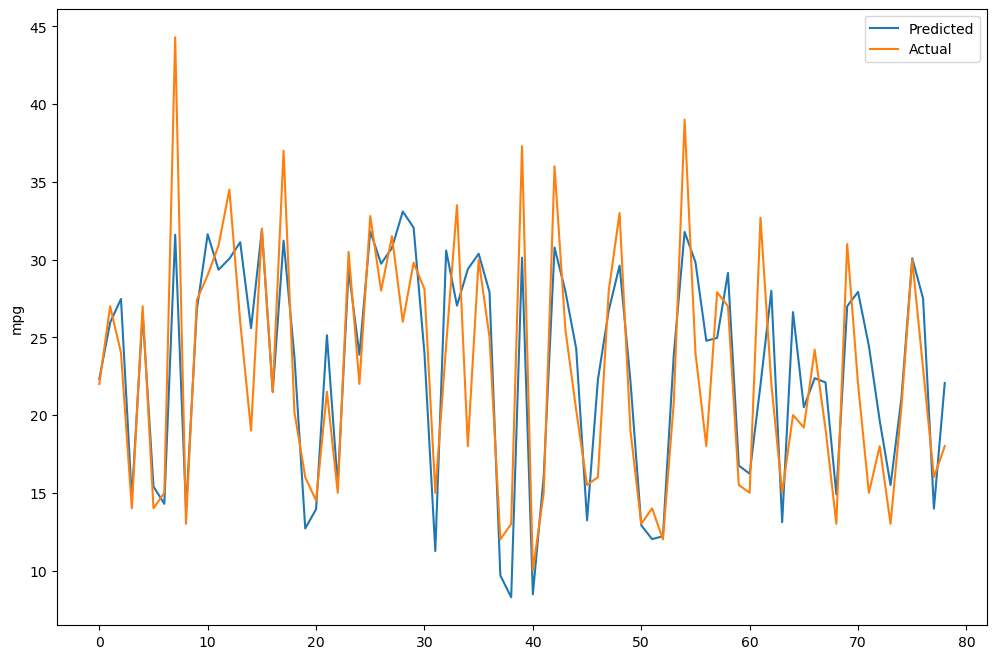

In [57]:
"""
functools.partial is used to create a new function with some of the original function's arguments 
    "fixed" or "frozen" to specific values. 
    
It allows you to create a new function that is essentially a partial version of an existing function. 

This can be useful in various situations
    especially when you want to simplify function calls or pass functions with specific arguments to other functions
"""
from functools import partial

features = ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']

# Simple ordinary least squares regression with ElasticNet (alpha=0) will trigger a convergence warning
    # We won't see the warning because we are ignoring warnings (see start of notebook)
    # This is not a recommended use for ElasticNet as LinearRegression should be used for OLS
elastic_net_ols = partial(elastic_net_reg, alpha=0, equivalent_to="OLS")

result_dict['mpg - kitchen_sink_elastic_net_ols'] = build_model(elastic_net_ols, 'mpg', features, automobile_df, show_plot_Y=True)

Equivalent to:  Lasso
Training score:  0.7140922909889371
Test score:  0.6812344023355144


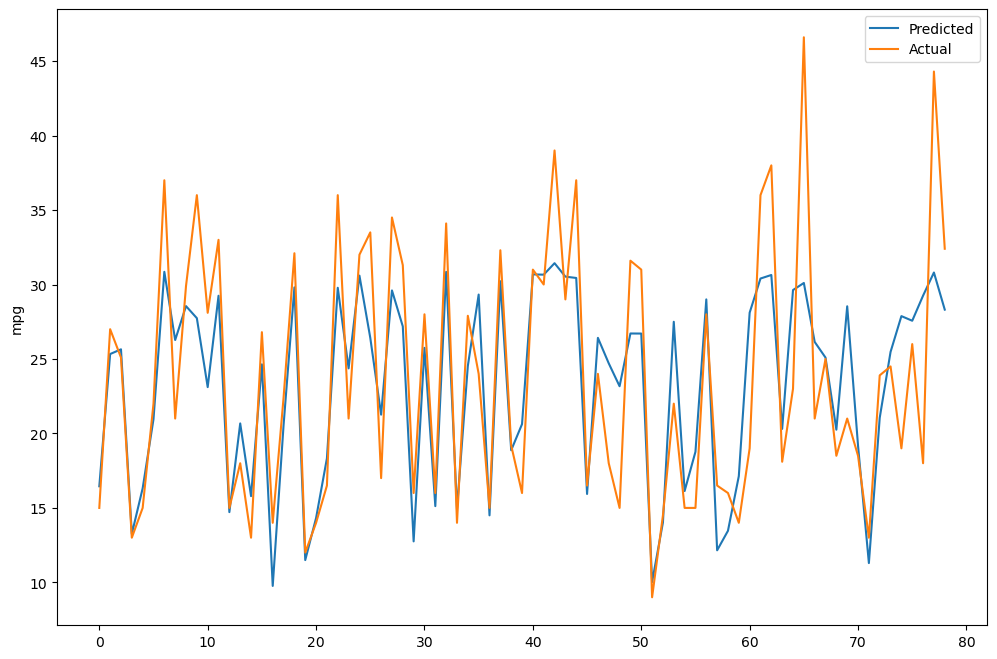

In [60]:
features = ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']

# lasso, l1_ratio = 1
elastic_net_lasso = partial(elastic_net_reg, alpha=1, l1_ratio=1, equivalent_to="Lasso")

result_dict['mpg - kitchen_sink_elastic_net_lasso'] = build_model(elastic_net_lasso, 'mpg', features, automobile_df, show_plot_Y=True)

Equivalent to:  Ridge
Training score:  0.7118536416074892
Test score:  0.6783763261464935


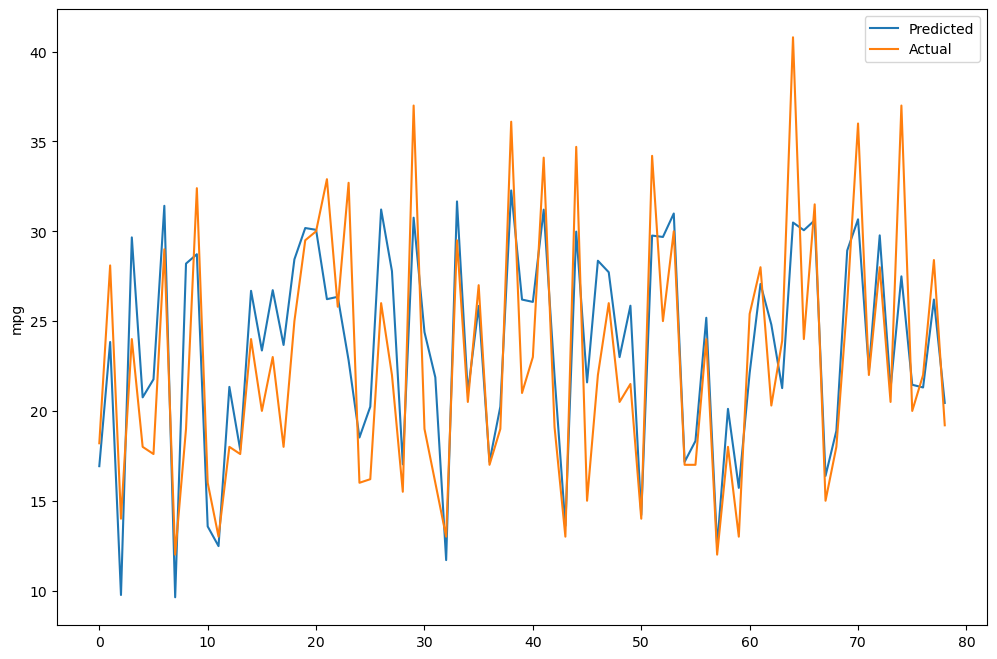

In [61]:
features = ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']

# ridge, l1_ratio = 0
elastic_net_ridge = partial(elastic_net_reg, alpha=1, l1_ratio=0, equivalent_to="Ridge")

result_dict['mpg - kitchen_sink_elastic_net_ridge'] = build_model(elastic_net_ridge, 'mpg', features, automobile_df, show_plot_Y=True)

Equivalent to:  Elastic Net
Training score:  0.7038673228515515
Test score:  0.7140540265876092


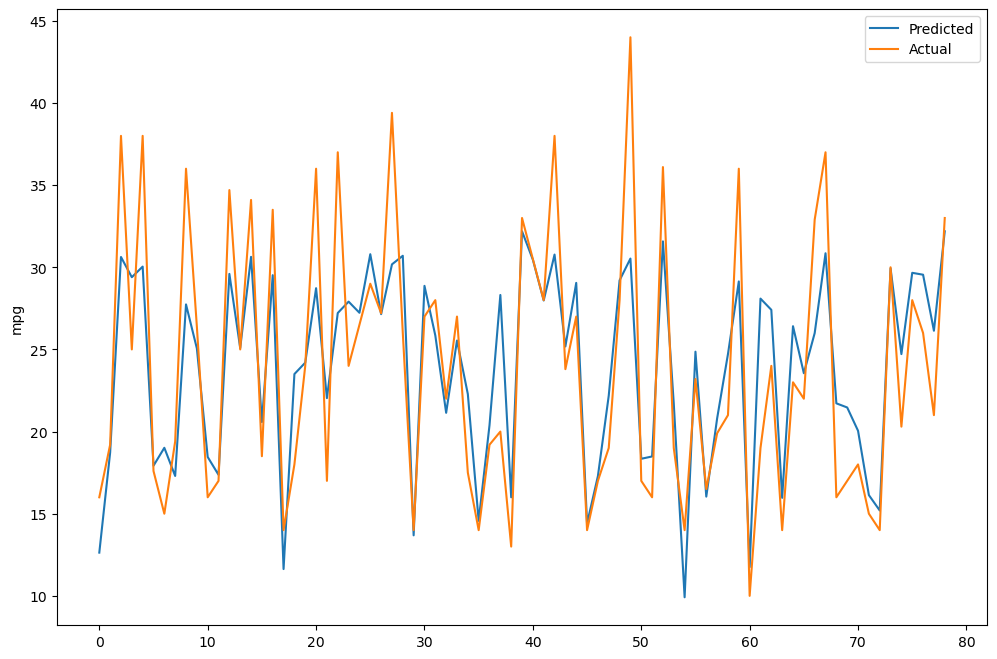

In [71]:
features = ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']

# elastic net, l1_ratio = 0.5
elastic_net_balanced = partial(elastic_net_reg, alpha=1, l1_ratio=0.5, equivalent_to="Elastic Net")

result_dict['mpg - kitchen_sink_elastic_net'] = build_model(elastic_net_balanced, 'mpg', features, automobile_df, show_plot_Y=True)

In [72]:
compare_results()

Regression:  mpg - single_linear
Training score:  0.6881406594698429
Test score:  0.7103575270683329

Regression:  mpg - kitchen_sink_linear
Training score:  0.6905566852404332
Test score:  0.7376605421872513

Regression:  mpg - parsimonious_linear
Training score:  0.7069855985365153
Test score:  0.6971042879601848

Regression:  mpg - kitchen_sink_lasso
Training score:  0.7002031029771738
Test score:  0.7327844464505631

Regression:  mpg - kitchen_sink_ridge
Training score:  0.6912231871580621
Test score:  0.7551857329851074

Regression:  mpg - kitchen_sink_elastic_net_ols
Training score:  0.7091031973214064
Test score:  0.6934488992763654

Regression:  mpg - kitchen_sink_elastic_net_lasso
Training score:  0.7140922909889371
Test score:  0.6812344023355144

Regression:  mpg - kitchen_sink_elastic_net_ridge
Training score:  0.7118536416074892
Test score:  0.6783763261464935

Regression:  mpg - kitchen_sink_elastic_net
Training score:  0.7038673228515515
Test score:  0.7140540265876092



In [73]:
# ----------------------------------------------------------- #
# --- (5) Performing Regression Using Multiple Techniques --- #

In [74]:
# --- Implementing Support Vector Regression --- #

In [75]:
"""
Support Vector Regression is similar to Support Vector Machines (used for classification),
but seeks to fit all points within the street margin whereas SVM seek to keep all points outside the margin.

SVM penalizes points on the wrong side of the line.

SVR penalizes points outside of the margin.

---

There are two scikit estimators for Support Vector Regression:

    1. SVR
    2. Linear SVR
    
They are essentially the same, Linear SVR is SVR with the linear kernel.

A kernel is a shortcut function that the algorithm uses to transform higher dimensional data into simpler dimensions.

According to scikit docs, LinearSVR is more flexibile regarding penalty options, loss functions, and scales better.

---

SVR tries to fit as many points as possible into a margin surrounding the best fit line that it calculates.

If margin is larger, more points will fit, but best fit line may not be a good approximation of the underlying data.

So there is a tradeoff...
"""

'\n\n'

In [76]:
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    """
    epsilon: The margin or "epsilon tube" = 2e (i.e., 2 x the epsilon value)
    C: The penalty applied to points that lie outside the epsilon tube (margin violation) while calculating errors
        The penalty seeks to minimize the margin violations when we fit our model
        A high value will impose a heavy penalty on outliers
    """
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.6921216828239185
Test score:  0.7004742720741097


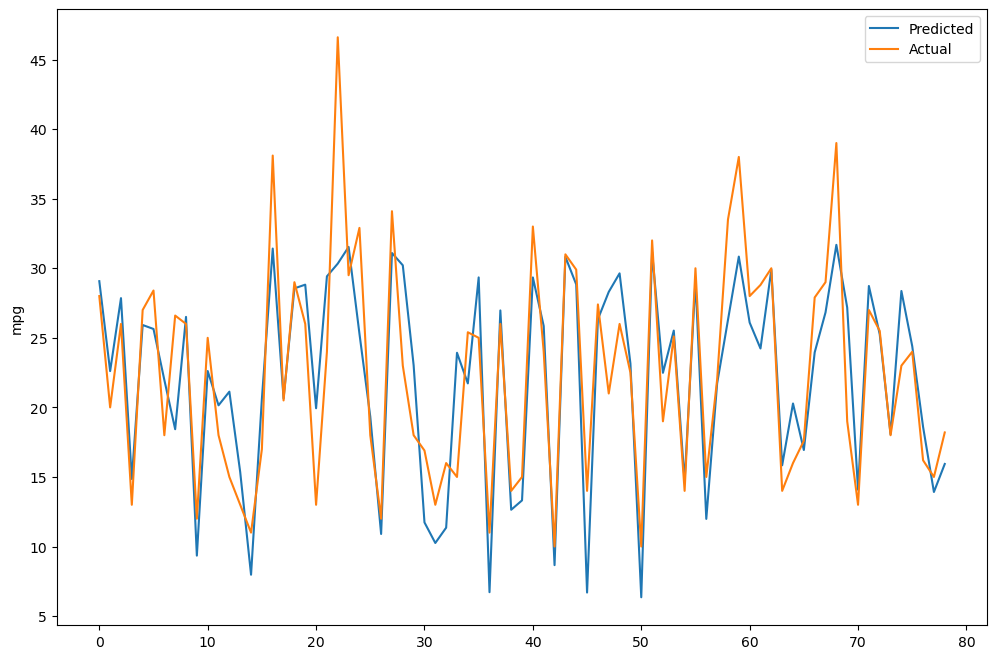

In [77]:
features = ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']

result_dict['mpg - kitchen_sink_svr'] = build_model(svr_reg, 'mpg', features, automobile_df, show_plot_Y=True)

In [78]:
# -- Nearest Neighbors Regression -- #
"""
Uses training data to find the point that is most similiar to the current sample.

There are multiple options (formulas) to calculate the distance between points:

    - Euclidean distance (most common - "as the crow flies" - shortest possible distance)
    - Hamming distance
    - Manahattan distance

There are two techniques for performing Nearest Neighbors Regression:

    1. K-Nearest Neighbors Regression (by far most common - find k closest points)
    2. Radius Neighbors Regression (find points that lie within a certain radius)
    
The predicted value is the average Y value of those neighbors.
"""

In [80]:
# -- Implementing K-nearest-neighbors Regression -- #

In [81]:
def kneighbors_reg(x_train, y_train, n_neighbors=10):
    # n_neighbors default is 5
    # Find the right value through hyperparameter tuning
    # The estimator chooses the best algorithm based on the data to compute nearest neighbors (brute force, etc.)
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.7358142398967022
Test score:  0.7897400147940592


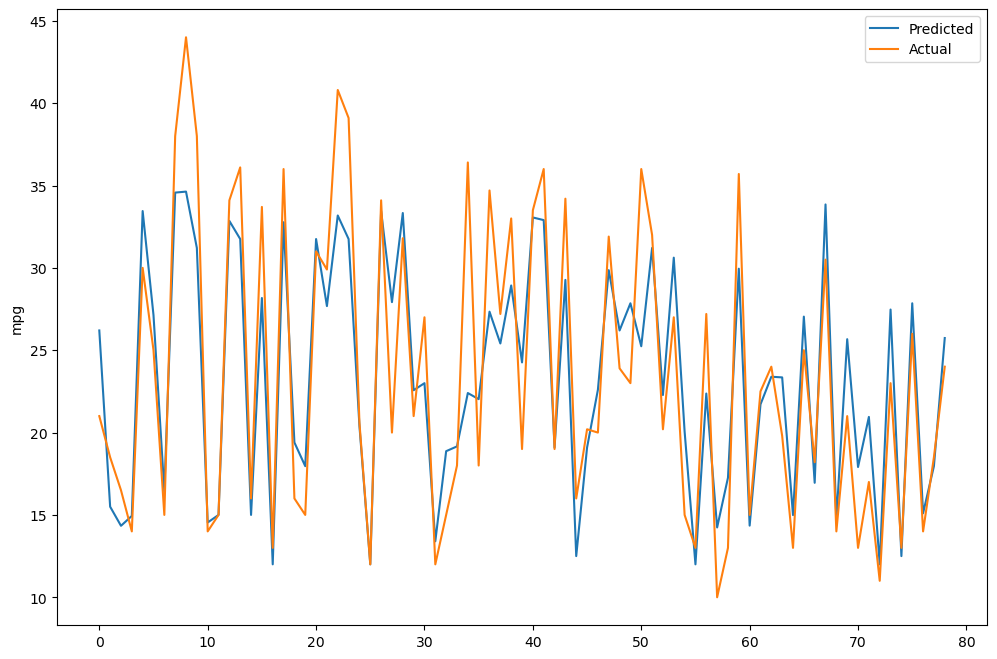

In [83]:
features = ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']

result_dict['mpg - kitchen_sink_kneighbors'] = build_model(kneighbors_reg, 'mpg', features, automobile_df, show_plot_Y=True)

In [84]:
compare_results()

Regression:  mpg - single_linear
Training score:  0.6881406594698429
Test score:  0.7103575270683329

Regression:  mpg - kitchen_sink_linear
Training score:  0.6905566852404332
Test score:  0.7376605421872513

Regression:  mpg - parsimonious_linear
Training score:  0.7069855985365153
Test score:  0.6971042879601848

Regression:  mpg - kitchen_sink_lasso
Training score:  0.7002031029771738
Test score:  0.7327844464505631

Regression:  mpg - kitchen_sink_ridge
Training score:  0.6912231871580621
Test score:  0.7551857329851074

Regression:  mpg - kitchen_sink_elastic_net_ols
Training score:  0.7091031973214064
Test score:  0.6934488992763654

Regression:  mpg - kitchen_sink_elastic_net_lasso
Training score:  0.7140922909889371
Test score:  0.6812344023355144

Regression:  mpg - kitchen_sink_elastic_net_ridge
Training score:  0.7118536416074892
Test score:  0.6783763261464935

Regression:  mpg - kitchen_sink_elastic_net
Training score:  0.7038673228515515
Test score:  0.7140540265876092



In [85]:
# -- Stochastic Gradient Descent Regression (SGD) -- #
"""
An iterative model for finding the best fit line (minimum MSE).
We want to find the regression coefficients (w + b) that give us the smallest MSE.
It starts with an initial value and performs gradient descent down a slope to find the lowest value (and corresponding coefficients).
It iteratively tweaks the values of the regression coefficients to converge on the best value of MSE.
It performs numerical optimization, one training instance at a time, to find the best model parameters.

It can use different loss functions:

    - MSE loss yields OLS regressior (ordinary least squares regression model)
    - Lasso, Ridge, or Elastic Net (applies penalty to loss function)

Works well for very large datasets.
    
"""

'\nAn iterative model for finding the best fit line (minimum MSE).\nWe want to find the regression coefficients (w + b) that give us the smallest MSE.\nIt starts with an initial value and performs gradient descent down a slope to find the lowest value (and corresponding coefficients).\nIt iteratively tweaks the values of the regression coefficients to converge on the best value of MSE.\n'

In [86]:
# -- Implementing Stochastic Gradient Descent Regression -- #

In [90]:
# Helper function that standardizes a dataset to have mean=0 and variance=1
# ToDo: Should this be used in the earlier models that uses normalize=True in the video and is no longer supported?
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    
    return scaler.transform(x)

In [104]:
def sgd_reg(x_train, y_train, max_iter=10000, tol=1e-3):
    """
    max_iter (epochs): considers one instance for each epoch
    tol (tolerance): stopping criteria (typically floating point), stops when loss of cosecutive iterations falls below 
    """
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.7169470522105024
Test score:  0.6481683307582556


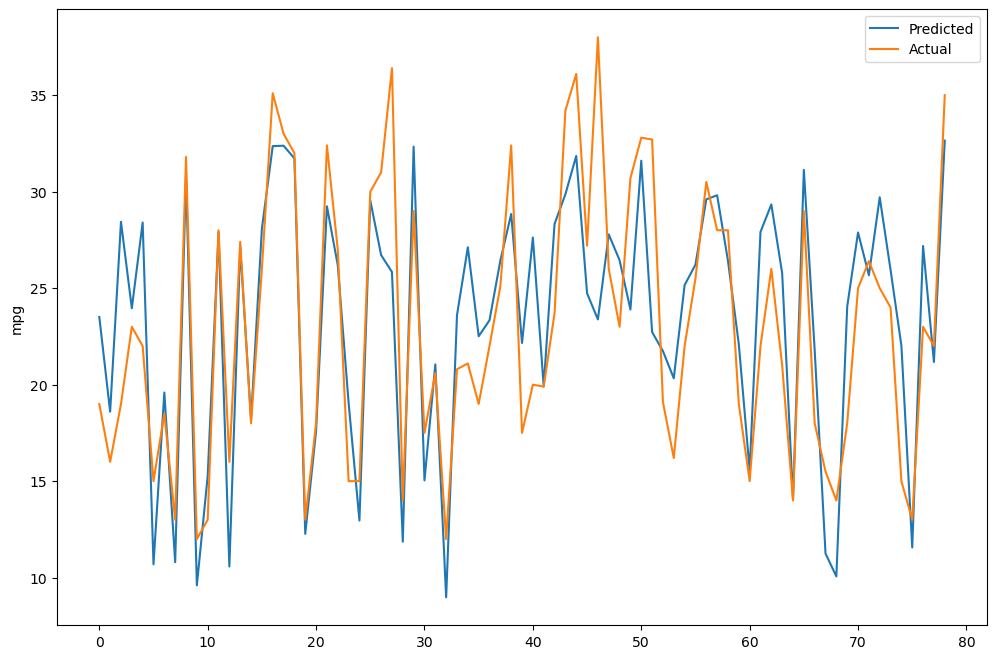

In [105]:
features = ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']

result_dict['mpg - kitchen_sink_sgd'] = build_model(sgd_reg, 'mpg', features, automobile_df, show_plot_Y=True, preprocess_fn=apply_standard_scaler)

In [106]:
# -- Decision Tree Regression -- #
"""
Typically used for classification but can also be used for regression (CART - Classification And Regression Tree).

Creates hierarchy of rules using training data
Fits knowledge into rules
Each rule involves a threshold to make decision
Order matters
    
First, traverse the tree to find right node
For Classification: Return most frequent label of all training data points in the node
For Regression: Return the average number of all training data points in that node
"""

'\nTypically used for classification but can also be used for regression (CART - Classification And Regression Tree).\n\nCreates hierarchy of rules using training data\nFits knowledge into rules\nEach rule involves a threshold to make decision\nOrder matters\n    \nFirst, traverse the tree to find right node\n    For Classification: Return most frequent label of all training data points in the node\n    For Regression: Return the average number of all training data points in that node\n\n\n'

In [107]:
# -- Implementing Decision Tree Regression -- #

In [109]:
# Splits underlying data into subsets where each subset contains points that it considers similiar
# This occurs repeatedly to form a tree structure where the shape of tree is influenced by specified constraints
# Ultimately the average value of all training instances in the corresponding leaf node is returned
def decision_tree_reg(x_train, y_train, max_depth=2):
    # max_depth is one of several parameters that can be used to contrain the size of the tree
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.7428851496541538
Test score:  0.6700182558186196


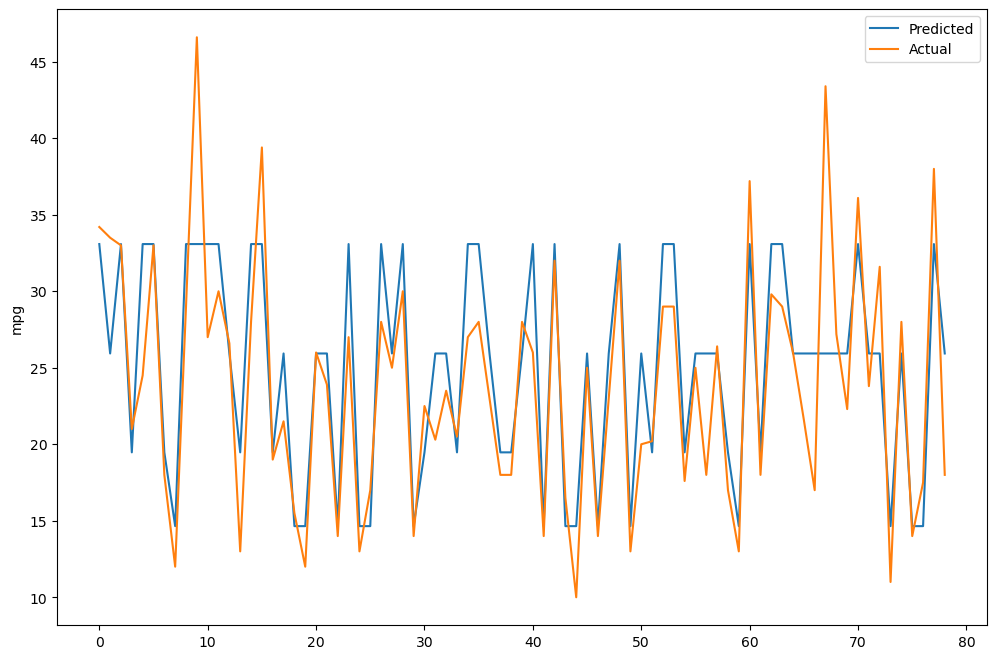

In [110]:
features = ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']

result_dict['mpg - kitchen_sink_decision_tree'] = build_model(decision_tree_reg, 'mpg', features, automobile_df, show_plot_Y=True)

In [111]:
# --- Least Angle Regression (LARS) --- #
"""
Works well when you have many more features (dimensions) than samples (points).
Selects x-variables that have the highest correlation (least angle) with the unexplained y-variable.

    - Parallel vectors with an angle of 0 degrees are perfectly aligned, correlation = 1
    - Opposite vectors with an angle of 180 degress are perfectly opposed, correlation = -1
    - Orthogonal vectors with an angle of 90 degress are uncorrelated, correlation = 0 (unrelated, independent variables)

It is intuitive and stable, equivalent to forward stepwise regression (add variables in one by one).
    LARS is much more efficient. LARS is the same complexity of OLS regression.
Has problems dealing with highly correlated x-variables (try to explore and remove ahead of time).
"""

In [112]:
# --- Implementing Least Angle Regression (LARS) --- #

In [113]:
def lars_reg(x_train, y_train, n_nonzero_coefs=4):
    # n_nonzero_coefs
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train, y_train)
    
    return model

Training score:  0.7022832440160438
Test score:  0.7186076698677846


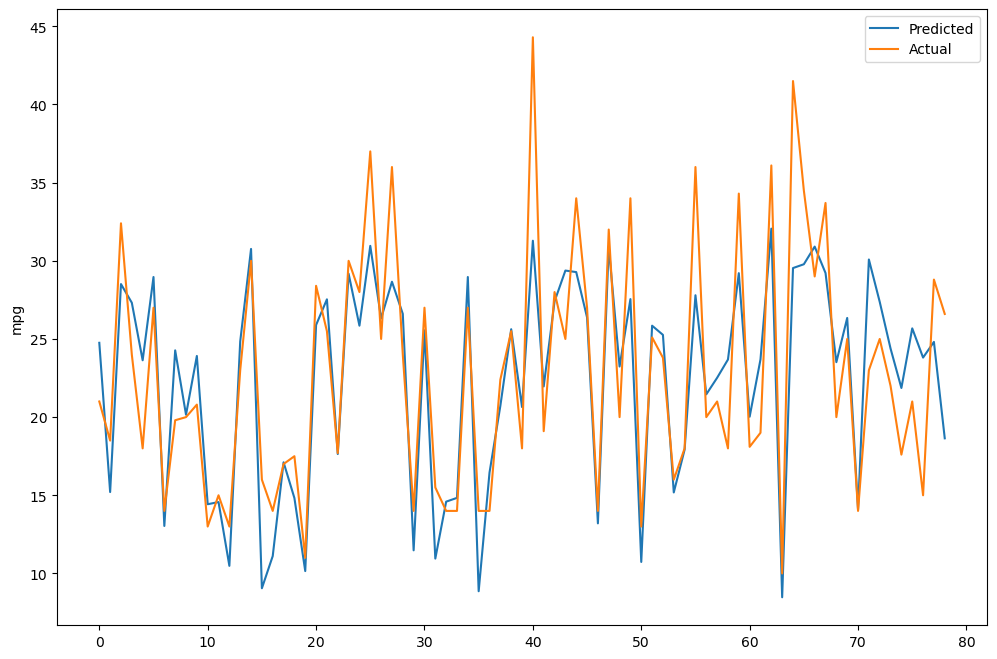

In [114]:
features = ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']
result_dict['mpg - kitchen_sink_lars'] = build_model(lars_reg, 'mpg', features, automobile_df, show_plot_Y=True)

In [ ]:
# --- Regression with Polynomial Regression --- #
"""
Linear Model = relationship between y and x is a polynomial of degree 1, y = Wx +b

Sometimes the relationships can't be captured in a linear model, e.g., polynomial of degree 2, f(x) = Vx^2 + Wx + b

Quadratic fit may perform better

Generate polynomials of a certain degree of all input features (apply transformations)
Fit a simpler model on this polynomial data
"""